In [140]:
import os
import torch
import numpy as np
import pandas as pd
import torch.nn.functional as F

In [141]:
device = 'cuda'
batch_size = 32
num_epochs = 100
learning_rate = 0.001

In [5]:
class Classifier(torch.nn.Module):

    def __init__(self):
        super(Classifier, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 10, kernel_size=3, stride=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(10, 20, kernel_size=3, stride=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(20, 32, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer4 = torch.nn.Sequential(
            torch.nn.Linear(32*9*9, 256, bias=False),
            torch.nn.ReLU(),
            torch.nn.MaxPool1d(kernel_size=2, stride=2),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 26)
        )
        self.dropout = torch.nn.Dropout(0.3)
    
    def forward(self, x):

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.dropout(x)
        x = self.layer3(x)
        x = self.dropout(x)
        out = self.layer4(x.reshape(x.shape[0], -1)) # input: batch_size x all_features

        return out # batch_size x 26

In [185]:
class Classifier(torch.nn.Module):

    def __init__(self):
        super(Classifier, self).__init__()
    
        self.first_pooling = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=3, stride=3, padding=1)
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=3, stride=3, padding=1)
        self.conv3 = torch.nn.Conv2d(20, 32, kernel_size=2, stride=2, padding=1)
        self.conv4 = torch.nn.Conv2d(32, 52, kernel_size=2, stride=2, padding=1)
        self.conv5 = torch.nn.Conv2d(52, 52, kernel_size=2, stride=2, padding=1)
        
        self.linear1 = torch.nn.Linear(32*10*10, 256)
        self.linear2 = torch.nn.Linear(128, 64)
        self.linear3 = torch.nn.Linear(64, 52)
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(0.3)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool1d = torch.nn.MaxPool1d(kernel_size=2, stride=2)
    
    def forward(self, x):
#         print(x.shape)32, 
#         x = self.first_pooling(x)
        print(x.shape)
        x = self.conv1(x)
        print(x.shape)
        x = self.max_pool2d(x)
        print(x.shape)
        x = self.conv2(x)
        print(x.shape)
        x = self.max_pool2d(x)
        print(x.shape)
        x = self.conv3(x)
        print(x.shape)
        x = self.max_pool2d(x)
        print(x.shape)
        x = self.conv4(x)
        print(x.shape)
        x = self.max_pool2d(x)
        print(x.shape)
        x = x.reshape(x.shape[0], -1)
        print(x.shape)
#         x = self.linear1(x)
#         print(x.shape)
#         x = self.max_pool1d(x)
#         print(x.shape)
#         x = self.linear2(x)
#         print(x.shape)
#         x = self.linear3(x)
#         print(x.shape)
        out = x

        return out # batch_size x 26

In [186]:
model = Classifier().to(device)

In [187]:
data = torch.rand((batch_size, 1, 600, 600)).to(device) # batch x 1 x 600 x 600 (batch, channel, width, height)

In [188]:
pred = model(data)

torch.Size([32, 1, 600, 600])
torch.Size([32, 10, 200, 200])
torch.Size([32, 10, 100, 100])
torch.Size([32, 20, 34, 34])
torch.Size([32, 20, 17, 17])
torch.Size([32, 32, 9, 9])
torch.Size([32, 32, 4, 4])
torch.Size([32, 52, 3, 3])
torch.Size([32, 52, 1, 1])
torch.Size([32, 52])


In [184]:
pred[0]

tensor([ 0.0671,  0.1723, -0.0190,  0.0260, -0.0988, -0.0387,  0.2059,  0.0885,
         0.2624,  0.0313,  0.0182,  0.1699,  0.1707, -0.0334,  0.1557,  0.0564,
         0.0178,  0.0208, -0.0300,  0.2163, -0.0585, -0.0453,  0.0852, -0.0350,
         0.0780,  0.2310,  0.0809,  0.0809, -0.0080,  0.1056,  0.0605,  0.0459,
         0.0986, -0.0494,  0.1439,  0.1302,  0.1783,  0.0986,  0.0202,  0.0770,
        -0.0204,  0.1131,  0.1106,  0.1113,  0.1346,  0.0755, -0.0217,  0.0218,
        -0.1104, -0.0822, -0.0685,  0.0742], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [25]:
softmax = torch.nn.Softmax(dim=1)

In [26]:
prob = softmax(pred)

In [30]:
torch.argmax(prob[0])

tensor(9, device='cuda:0')

In [31]:
prob[0]

tensor([0.0386, 0.0358, 0.0356, 0.0353, 0.0409, 0.0347, 0.0405, 0.0369, 0.0387,
        0.0452, 0.0401, 0.0338, 0.0337, 0.0407, 0.0412, 0.0410, 0.0361, 0.0355,
        0.0401, 0.0421, 0.0386, 0.0390, 0.0386, 0.0407, 0.0387, 0.0382],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [39]:
torch.argmax(pred, axis=1)

tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9], device='cuda:0')

In [ ]:
def cal_acc(pred, label):
    '''
    pred: batch_size x 26 with probabilities
    label: batch_size x 26 in one-hot format
    '''
    pred_word = torch.argmax(pred, axis=1)
    label_word = torch.argmax(label, axis=1)
    correct_pred_counts = torch.sum(pred_word == pred_word)
    
    acc = correct_pred_counts.item() / len(pred) # just float not torch
    
    return acc

In [42]:
pred = torch.randn((32,26))
label = torch.randn((32,26))

In [48]:
torch.sum(pred_word == pred_word)

tensor(32)

In [ ]:
pred_word

In [3]:
##############
# dataloader #
##############

In [15]:
import os
import numpy as np
import torchvision.transforms as transforms
from torchvision import datasets

In [16]:
def get_mean_std(data_dir):
    '''
    이미지 정규화 시 성능 향상 , 평균과 표준편차로 정규화 실행
    data_dir = 이미지 들어있는 폴더 path
    '''
    transform = transforms.Compose([
        transforms.Resize((600, 600)),
        transforms.ToTensor()
    ])

    dataset = datasets.ImageFolder(os.path.join(f'./{data_dir}'), transform)
    print("데이터 정보", dataset)

    meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x,_ in dataset]
    stdRGB = [np.std(x.numpy(), axis=(1,2)) for x,_ in dataset]

    meanR = np.mean([m[0] for m in meanRGB])
    meanG = np.mean([m[1] for m in meanRGB])
    meanB = np.mean([m[2] for m in meanRGB])

    stdR = np.mean([s[0] for s in stdRGB])
    stdG = np.mean([s[1] for s in stdRGB])
    stdB = np.mean([s[2] for s in stdRGB])
    print("평균",meanR, meanG, meanB)
    print("표준편차",stdR, stdG, stdB)

In [17]:
# train data, test data 다르게 nomalization 적용하려면 data_dir 바꾸세요.
data_dir = "data/letter_classifier"
get_mean_std(data_dir)

데이터 정보 Dataset ImageFolder
    Number of datapoints: 520
    Root location: ./data/letter_classifier
    StandardTransform
Transform: Compose(
               Resize(size=(600, 600), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
평균 0.89839834 0.89839834 0.89839834
표준편차 0.28976783 0.28976783 0.28976783


In [135]:
from torch.utils.data.sampler import SubsetRandomSampler
import torch

data_dir = "./"


np.random.seed(0)
torch.manual_seed(0)

def create_datasets(batch_size):
    
    train_transform = transforms.Compose([
    transforms.Grayscale(1),
    transforms.RandomRotation([-30, 30], fill=255),
    transforms.RandomPerspective(distortion_scale=0.7, p=1, fill=255),
    transforms.ToTensor(),  # 이 과정에서 [0, 255]의 범위를 갖는 값들을 [0.0, 1.0]으로 정규화, torch.FloatTensor로 변환
    transforms.Normalize([0.89839834], [0.28976783])  #  정규화(normalization)
])
    test_transform = transforms.Compose([   # 나중에 test 데이터 불러올 때 참고하세요. 
    transforms.ToTensor(), # 이 과정에서 [0, 255]의 범위를 갖는 값들을 [0.0, 1.0]으로 정규화 
    transforms.Grayscale(1),
    transforms.Normalize([0.89839834], [0.28976783])  # 테스트 데이터로 계산을 진행해서 따로 지정해주어도 좋습니다
])

    # choose the training and test datasets
    train_data = datasets.ImageFolder(os.path.join(data_dir, 'data/letter_classifier'), train_transform)


    # trainning set 중 validation 데이터로 사용할 비율
    valid_size = 0.3

    # validation으로 사용할 trainning indices를 얻는다.
    num_train = len(train_data)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]

    # trainning, validation batch를 얻기 위한 sampler정의
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    # load training data in batches
    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=train_sampler,
                                               num_workers=4)

    # load validation data in batches
    valid_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=valid_sampler,
                                               num_workers=4)

    return train_data, train_loader, valid_loader

In [136]:
train_data, train_loader, valid_loader = create_datasets(batch_size=4)


print('train 데이터셋 크기:', len(train_data))

class_names = train_data.classes
print('클래스:', class_names)

train 데이터셋 크기: 520
클래스: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [137]:
import torchvision
import matplotlib.pyplot as plt

In [138]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.89839834, 0.89839834, 0.89839834])
    std = np.array([0.28976783, 0.28976783, 0.28976783])
    input = std * input + mean
    input = np.clip(input, 0, 1)

    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()

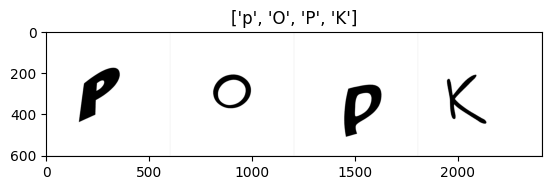

torch.Size([4, 1, 600, 600])


In [139]:
iterator = iter(train_loader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])
print(inputs.shape)

In [44]:
a = [1,2,3]

In [47]:
np.save('test.npy', a)

In [48]:
tmp = np.load('test.npy')

In [49]:
tmp

array([1, 2, 3])

In [ ]:


plt.figure(figsize=(10, 5))
plt.plot(train_loss_buffer, label='train', color='blue')
plt.plot(valid_loss_buffer, label='valid', color='red')
plt.xlabel('Epochs')
plt.title('Cross Entropy Loss')
plt.savefig('./training_logs/1_loss.png')

plt.figure(figsize=(10, 5))
plt.plot(train_acc_buffer, label='train', color='blue')
plt.plot(valid_acc_buffer, label='valid', color='red')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.savefig('./training_logs/1_acc.png')